In [115]:
#import packages 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Data Preparation 

In [116]:
#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D209/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [117]:
#determine column names, non-null values, & data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [118]:
#There are no missing/null values. 

#determine if any rows are duplicated 
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
0


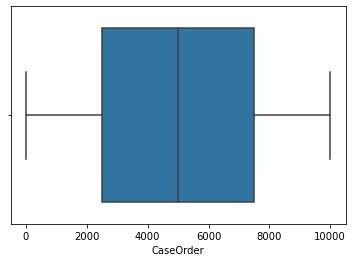

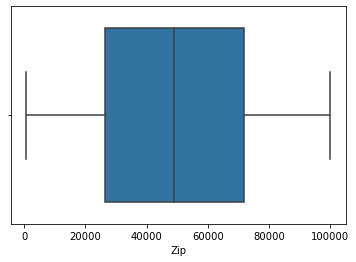

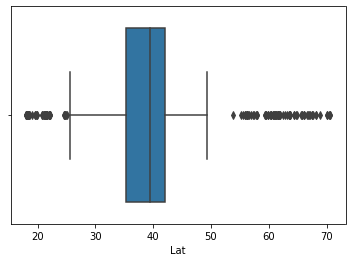

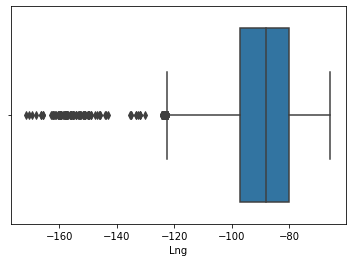

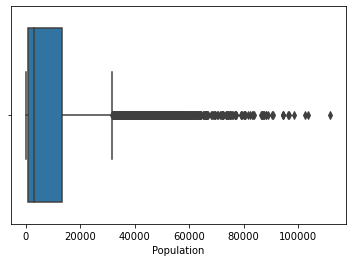

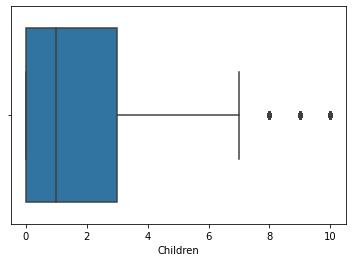

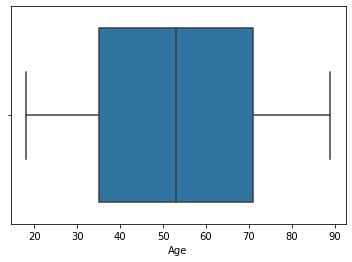

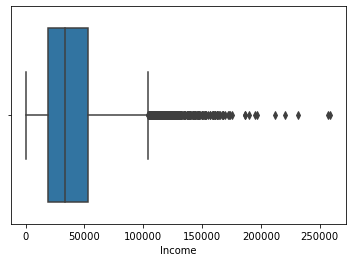

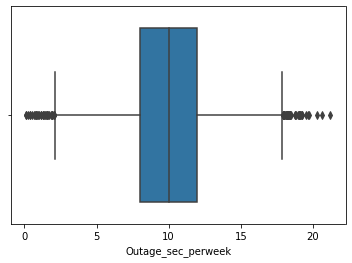

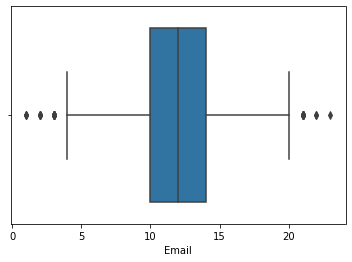

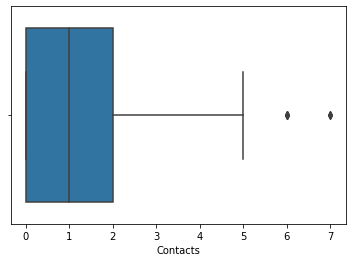

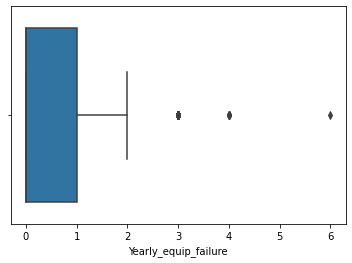

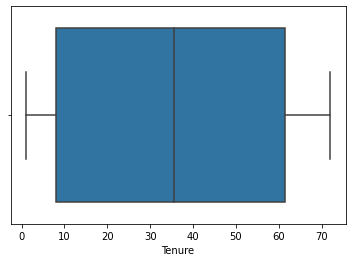

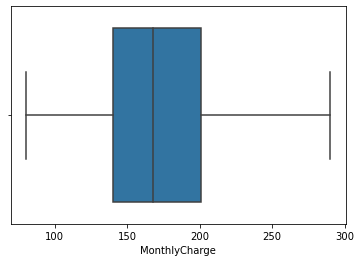

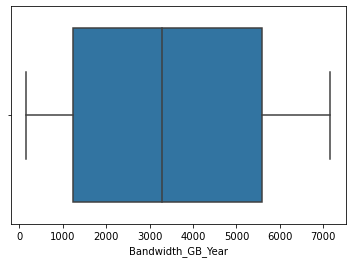

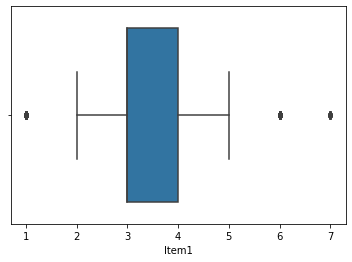

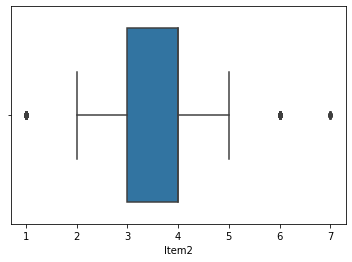

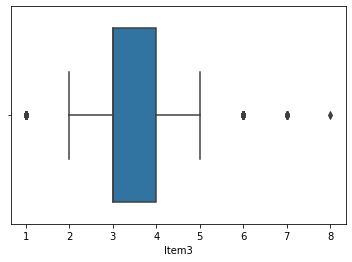

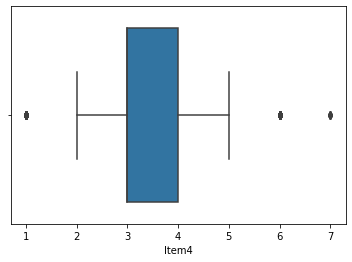

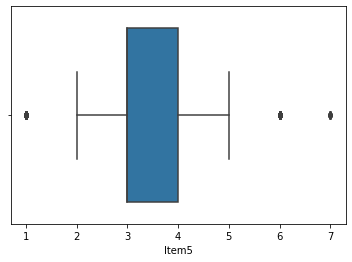

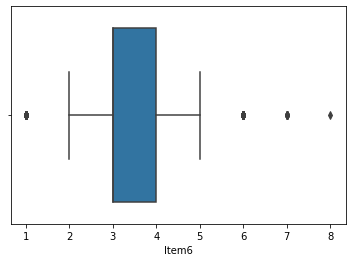

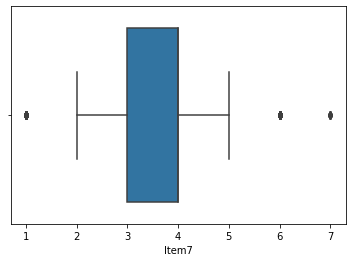

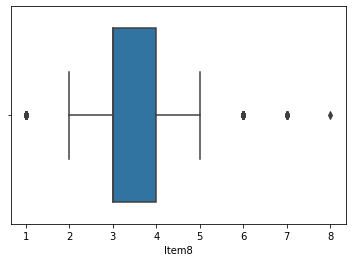

In [119]:
#There are no duplicated values

#Using Boxplots, check for outliers in each in each float or integer value column.
outliers = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

i=0 
while i < len(outliers):
    sns.boxplot(x = outliers[i], data = df)
    plt.show()
    i = i + 1

In [120]:
#Outliers found in Lat, Lng, Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Item1, Item2, Item3, Item4, Item5, Item6, Item7, & Item8 columns. 
#Retain outliers in all variables (all values are within reasonable ranges)

In [121]:
#Drop Columns not used as Target or Explanatory Variables 
df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'InternetService', 'OnlineSecurity', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1, inplace = True)

In [122]:
#Descriptive Statistics for all relevant variables
relevant_variables = [df['Population'], df['Income'], df['Churn'], df['Outage_sec_perweek'], df['Email'], df['Contacts'], df['Yearly_equip_failure'], df['Contract'], df['Phone'], df['Multiple'], df['OnlineBackup'], df['DeviceProtection'], df['TechSupport'], df['StreamingTV'], df['StreamingMovies'], df['Tenure'], df['MonthlyCharge'], df['Bandwidth_GB_Year']]
rv = ['Population', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(relevant_variables):
    print(' ')
    print(str(rv[i]) + ' Descriptive Statistics')
    print(relevant_variables[i]. describe())
    i = i + 1

 
Population Descriptive Statistics
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
 
Income Descriptive Statistics
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64
 
Churn Descriptive Statistics
count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
 
Outage_sec_perweek Descriptive Statistics
count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64
 
Email Descriptive Statistics
count    10000.000000
mean        12.016000
std          3.025898
min          1.000000


In [123]:
#Re-expressing Categorical Variables
#label encoding yes/no dichotomous binary columns. Yes = 1, No = 0
labelencoder = LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])
df['Phone'] = labelencoder.fit_transform(df['Phone'])
df['Multiple'] = labelencoder.fit_transform(df['Multiple'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])

In [124]:
#Ordinal Encoding
df['Contract'] = df['Contract'] 
dict_edu = {'Contract': {'Month-to-month': 0, 'One year': 1, 'Two Year': 2}}
df.replace(dict_edu, inplace = True)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Outage_sec_perweek'}>],
       [<AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Contract'}>],
       [<AxesSubplot:title={'center':'Phone'}>,
        <AxesSubplot:title={'center':'Multiple'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>],
       [<AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>, <Axe

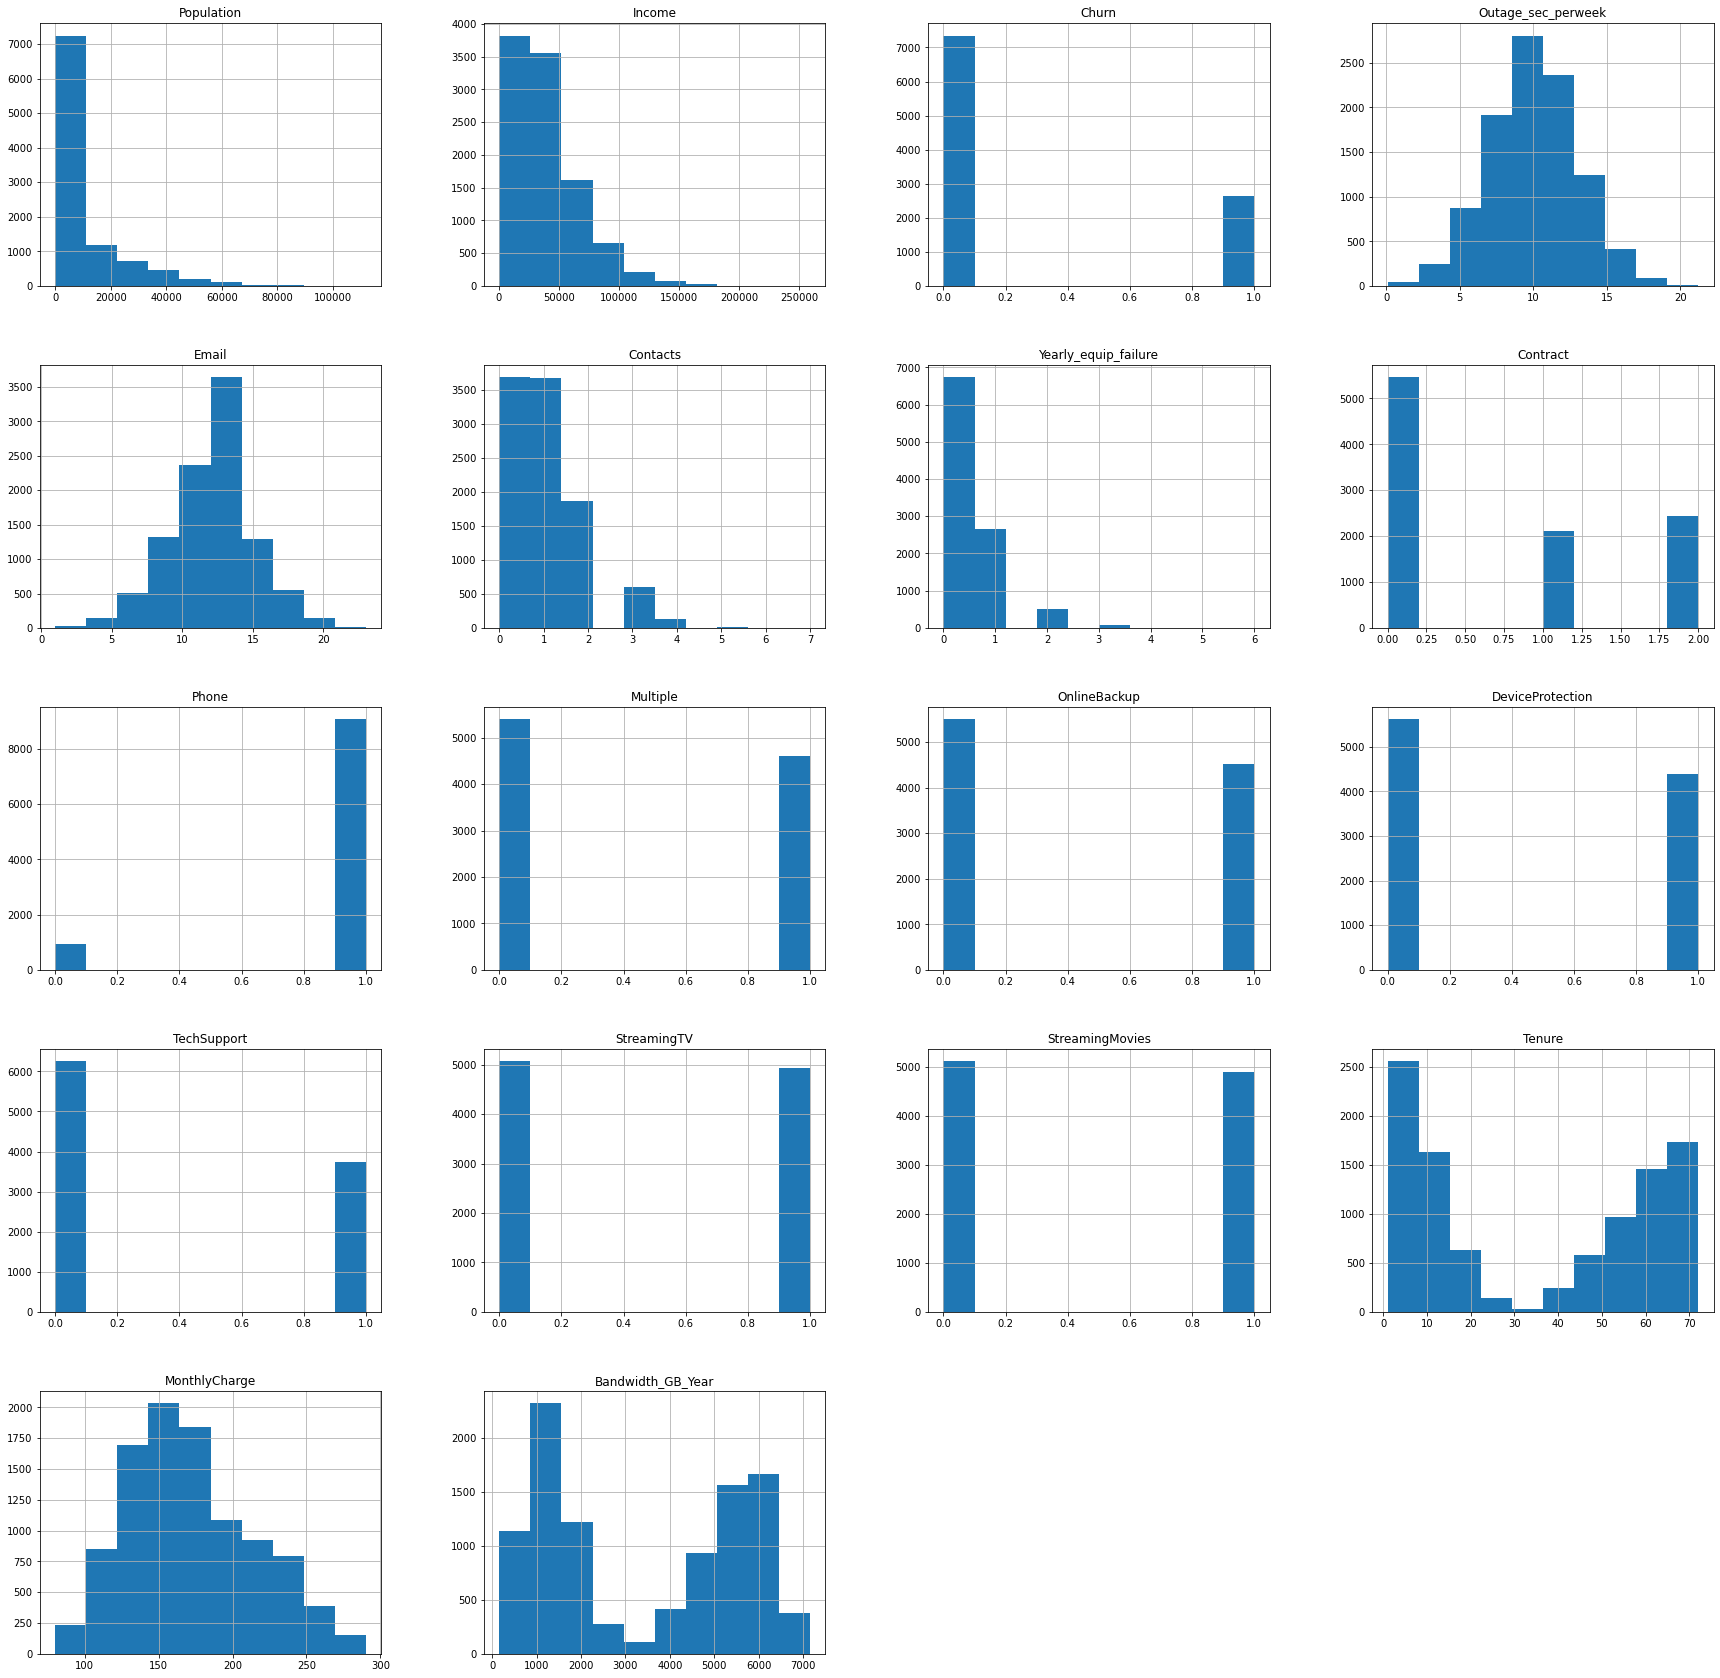

In [125]:
#Visually explore target & explanatory variables with univariate analysis by creating histograms 
df.hist(column=['Population', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], figsize=(30,30))


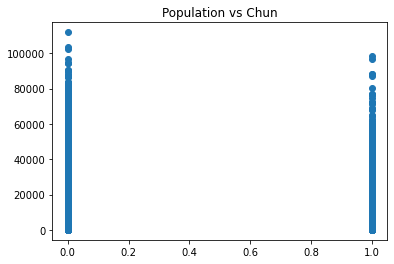

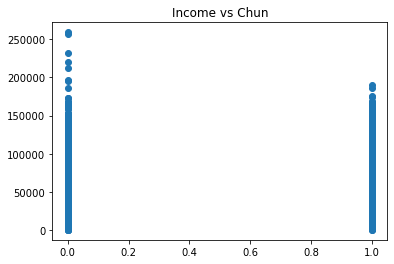

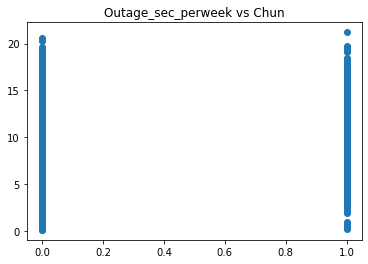

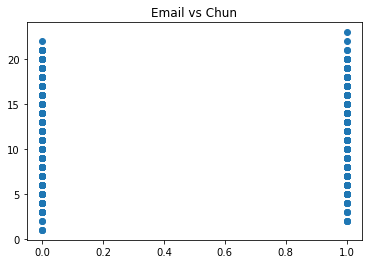

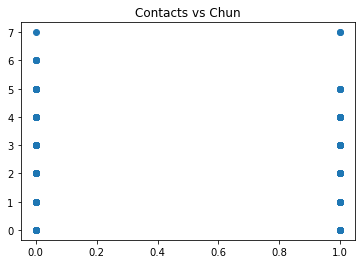

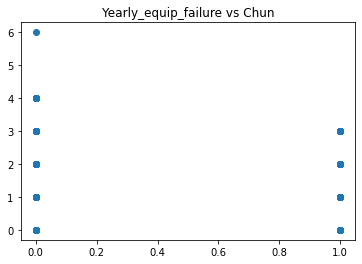

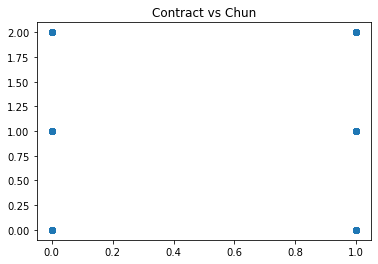

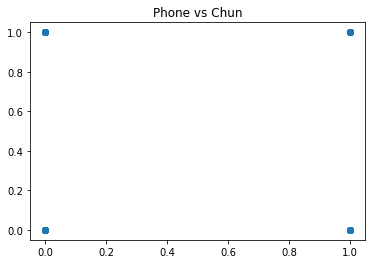

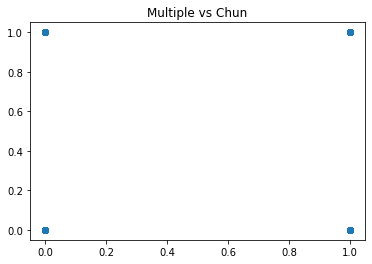

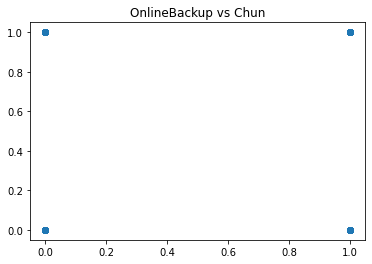

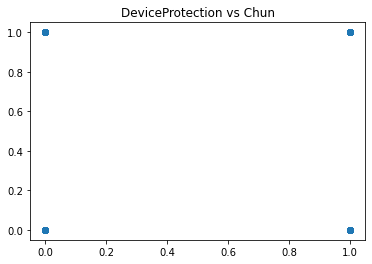

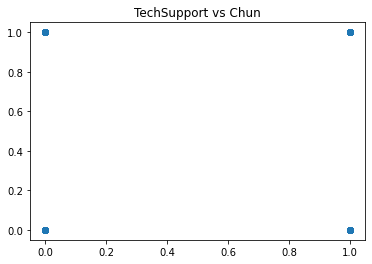

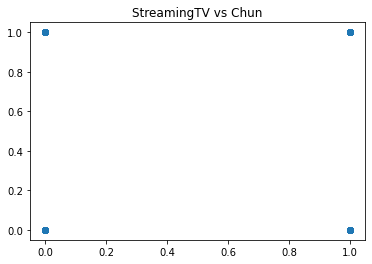

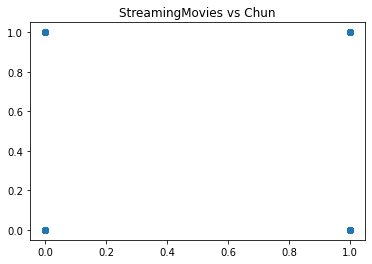

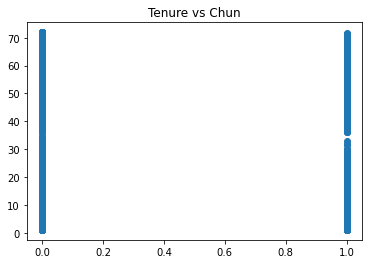

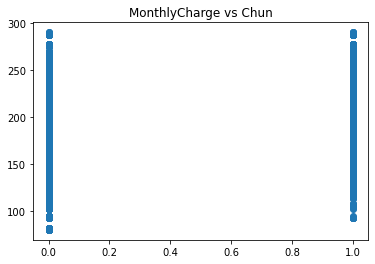

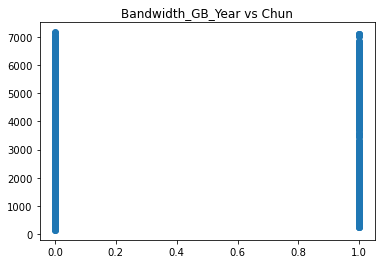

In [126]:
#Visually explore relationship between target and explanatory variables with bivariate analysis by creating scatterplots
nv = ['Population', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(nv):
    plt.scatter(df['Churn'], df[nv[i]])
    plt.title(str(nv[i]) + ' vs Chun')
    plt.show()
    i = i + 1

In [127]:
df.to_csv('/Users/Amanda.Hartzler/Desktop/D209_PA_Task1.csv')

# KNN Classification

In [128]:
# Create arrays for the features and the response variable
y = df['Churn'].values
X = df.drop('Churn', axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify=y)
#(GeeksforGeeks, 2021)

print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)
#(Verma, 2020)

shape of original dataset : (10000, 19)
shape of input - training set (7000, 18)
shape of output - training set (7000,)
shape of input - testing set (3000, 18)
shape of output - testing set (3000,)


In [129]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

[0 0 0 ... 0 0 0]
0.7196666666666667


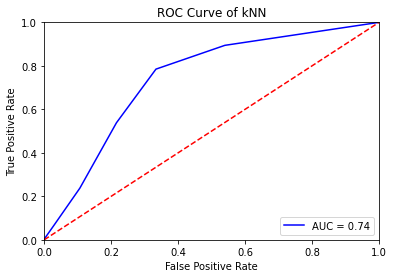

In [130]:
#(Chelaru, 2018)
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()